In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
d_default = 8.64
mu_1_default = 4.95*100
mu_2_default = 4.95*0.01
v_s_default = 0.12
v_d_default = 1.23
w_default = 0.001
k_1_default = 2.19*0.0001
k_2_default = 6.12*0.00001
k_3_default = 0.997148
k_4_default = 6.79*0.01


In [3]:
     
def RK4(a0, b0, x0, y0, z0, t0, h, F5, F4, F3, F2, F1):

    ka1 = h*F5(a0, b0, x0, y0, z0, t0)
    kb1 = h*F4(a0, b0, x0, y0, z0, t0)
    kx1 = h*F3(a0, b0, x0, y0, z0, t0)
    ky1 = h*F2(a0, b0, x0, y0, z0, t0)
    kz1 = h*F1(a0, b0, x0, y0, z0, t0)
    
    ka2 = h*F5(a0+h*ka1/2, b0+h*kb1/2, x0+h*kx1/2, y0+h*ky1/2, z0+h*kz1/2, t0+h/2)
    kb2 = h*F4(a0+h*ka1/2, b0+h*kb1/2, x0+h*kx1/2, y0+h*ky1/2, z0+h*kz1/2, t0+h/2)
    kx2 = h*F3(a0+h*ka1/2, b0+h*kb1/2, x0+h*kx1/2, y0+h*ky1/2, z0+h*kz1/2, t0+h/2)
    ky2 = h*F2(a0+h*ka1/2, b0+h*kb1/2, x0+h*kx1/2, y0+h*ky1/2, z0+h*kz1/2, t0+h/2)
    kz2 = h*F1(a0+h*ka1/2, b0+h*kb1/2, x0+h*kx1/2, y0+h*ky1/2, z0+h*kz1/2, t0+h/2)
    
    ka3 = h*F5(a0+h*ka2/2, b0+h*kb2/2, x0+h*kx2/2, y0+h*ky2/2, z0+h*kz2/2, t0+h/2)
    kb3 = h*F4(a0+h*ka2/2, b0+h*kb2/2, x0+h*kx2/2, y0+h*ky2/2, z0+h*kz2/2, t0+h/2)
    kx3 = h*F3(a0+h*ka2/2, b0+h*kb2/2, x0+h*kx2/2, y0+h*ky2/2, z0+h*kz2/2, t0+h/2)
    ky3 = h*F2(a0+h*ka2/2, b0+h*kb2/2, x0+h*kx2/2, y0+h*ky2/2, z0+h*kz2/2, t0+h/2)
    kz3 = h*F1(a0+h*ka2/2, b0+h*kb2/2, x0+h*kx2/2, y0+h*ky2/2, z0+h*kz2/2, t0+h/2)
    
    ka4 = h*F5(a0+h*ka3, b0+h*kb3, x0+h*kx3, y0+h*ky3, z0+h*kz3, t0+h)
    kb4 = h*F4(a0+h*ka3, b0+h*kb3, x0+h*kx3, y0+h*ky3, z0+h*kz3, t0+h)
    kx4 = h*F3(a0+h*ka3, b0+h*kb3, x0+h*kx3, y0+h*ky3, z0+h*kz3, t0+h)     
    ky4 = h*F2(a0+h*ka3, b0+h*kb3, x0+h*kx3, y0+h*ky3, z0+h*kz3, t0+h)
    kz4 = h*F1(a0+h*ka3, b0+h*kb3, x0+h*kx3, y0+h*ky3, z0+h*kz3, t0+h)
    
    an = a0 + (1/6.)*(ka1 + 2*ka2 + 2*ka3 + ka4)
    bn = b0 + (1/6.)*(kb1 + 2*kb2 + 2*kb3 + kb4)
    xn = x0 + (1/6.)*(kx1 + 2*kx2 + 2*kx3 + kx4)
    yn = y0 + (1/6.)*(ky1 + 2*ky2 + 2*ky3 + ky4) 
    zn = z0 + (1/6.)*(kz1 + 2*kz2 + 2*kz3 + kz4)
    
    return [an,bn,xn,yn,zn]

In [4]:
def f(t):
    C = [2.0, 10.5, 2.7]
    T = [1988., 2100., 2265.]
    S = [21., 96., 57.]
    
    f=0
    for i in range(len(T)):
        f+=C[i]*np.exp(-(t-T[i])**2/S[i]**2)
    return f
        
    

In [5]:
def F5(p, sigma_s, sigma_d, alpha_s, alpha_d, t):
    
    h_s = (sigma_s -(sigma_s**2 - k_3_default*alpha_s*(2*sigma_s-alpha_s))**(0.5))/k_3_default
    c_s = (alpha_s - h_s)/2
    p_s = k_4_default*(h_s)**2/c_s
    
    F5 = (p_s - p)/d_default + f(t)/mu_1_default
    
    return F5

def F4(p, sigma_s, sigma_d, alpha_s, alpha_d, t):
    
    h_s = (sigma_s -(sigma_s**2 - k_3_default*alpha_s*(2*sigma_s-alpha_s))**(0.5))/k_3_default
    c_s = (alpha_s - h_s)/2
    p_s = k_4_default*(h_s)**2/c_s
    
    F4 = (w_default*(sigma_d - sigma_s) - k_1_default - mu_2_default*(p_s-p)/d_default)/v_s_default
    
    return F4

def F3(p, sigma_s, sigma_d, alpha_s, alpha_d, t):

    F3 = (k_1_default - w_default*(sigma_d - sigma_s))/v_d_default
    
    return F3

def F2(p, sigma_s, sigma_d, alpha_s, alpha_d, t):

    F2 = (w_default*(alpha_d - alpha_s) - k_2_default)/v_s_default
    
    return F2

def F1(p, sigma_s, sigma_d, alpha_s, alpha_d, t):
    
    F1 = (k_2_default - w_default*(alpha_d - alpha_s))/v_d_default
    
    return F1
    

In [6]:
Numpuntos=np.array([10,100,1000,10000,1000000])

p_initial = 1.00
sigma_s_initial = 2.01
sigma_d_initial = 2.23
alpha_s_initial = 2.20
alpha_d_initial = 2.26 
t_initial = 1000.
t_final = 5000.

In [7]:
p_sol = []
sigma_s_sol = []
sigma_d_sol = []
alpha_s_sol = []
alpha_d_sol = []

H=(t_final-t_initial)/Numpuntos

In [8]:
T=np.linspace(t_initial, t_final, Numpuntos[3])

p_sol.append(p_initial)
sigma_s_sol.append(sigma_s_initial)
sigma_d_sol.append(sigma_d_initial)
alpha_s_sol.append(alpha_s_initial)
alpha_d_sol.append(alpha_d_initial)



h=np.abs(t_final-t_initial)/Numpuntos[3]

#V=[p_initial, sigma_s_initial, sigma_d_initial, alpha_s_initial, alpha_d_initial]
for i in T[1:]:
    
    pn = RK4(p_sol[-1], sigma_s_sol[-1], sigma_d_sol[-1], alpha_s_sol[-1], alpha_d_sol[-1], i, h, F5, F4, F3, F2, F1)[0]
    sigma_sn = RK4(p_sol[-1], sigma_s_sol[-1], sigma_d_sol[-1], alpha_s_sol[-1], alpha_d_sol[-1], i, h, F5, F4, F3, F2, F1)[1]
    sigma_dn = RK4(p_sol[-1], sigma_s_sol[-1], sigma_d_sol[-1], alpha_s_sol[-1], alpha_d_sol[-1], i, h, F5, F4, F3, F2, F1)[2]
    alpha_sn = RK4(p_sol[-1], sigma_s_sol[-1], sigma_d_sol[-1], alpha_s_sol[-1], alpha_d_sol[-1], i, h, F5, F4, F3, F2, F1)[3]
    alpha_dn = RK4(p_sol[-1], sigma_s_sol[-1], sigma_d_sol[-1], alpha_s_sol[-1], alpha_d_sol[-1], i, h, F5, F4, F3, F2, F1)[4]
    #V[0],V[1],V[2],V[3],V[4] = pn, sigma_sn, sigma_dn, alpha_sn, alpha_dn
    
    p_sol.append(pn)
    sigma_s_sol.append(sigma_sn)
    sigma_d_sol.append(sigma_dn)
    alpha_s_sol.append(alpha_sn)
    alpha_d_sol.append(alpha_dn)
    

In [9]:
len(T),len(p_sol)

(10000, 10000)

In [10]:
h_s_sol=[]
c_s_sol=[]
p_s_sol=[]

for i in range(len(T)):
    h_s = (sigma_s_sol[i] - (sigma_s_sol[i]**2 - k_3_default*alpha_s_sol[i]*(2*sigma_s_sol[i] - alpha_s_sol[i]))**(0.5))/k_3_default
    c_s = (alpha_s_sol[i] - h_s)/2
    p_s = k_4_default*h_s**2/c_s
    
    h_s_sol.append(h_s)
    c_s_sol.append(c_s)
    p_s_sol.append(p_s)
    

In [11]:
F=[]
for i in range(len(T)):
    F.append(f(T[i])/10.)

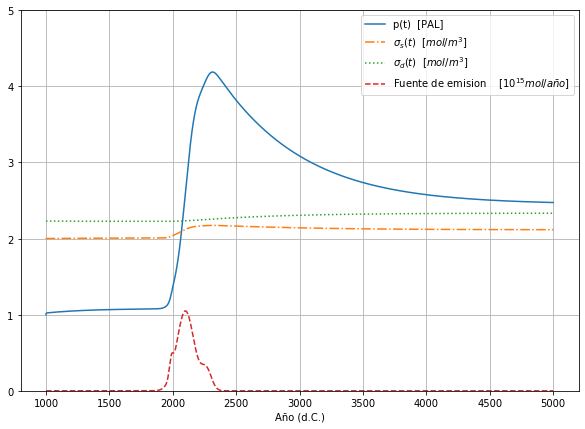

In [12]:
plt.figure(figsize=(10,7))
plt.plot(T,p_sol, label='p(t)  [PAL]')
plt.plot(T,sigma_s_sol,'-.', label=r'$\sigma_{s} (t)$  $[mol / m^{3}]$')
plt.plot(T,sigma_d_sol,':', label=r'$\sigma_{d} (t)$  $[mol / m^{3}]$')
plt.plot(T,F, '--',label='Fuente de emision    $[10^{15} mol / año]$')
plt.grid()
plt.legend()
plt.xlabel('Año (d.C.)')
plt.ylim(0,5)
#plt.xlim(1800,2600)
plt.savefig('Solucion_sistema.png')

In [13]:
p_sol.index(max(p_sol))

3284

In [14]:
T[3375]

2350.13501350135

In [15]:
p_sol[3375]-max(p_sol)

-0.04118984262504455

In [16]:
T[p_sol.index(max(p_sol))]

2313.7313731373138

In [17]:
T[F.index(max(F))]

2100.1100110011002

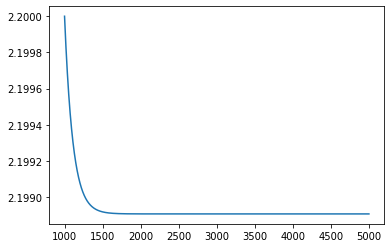

In [18]:
plt.plot(T,alpha_s_sol)
#plt.ylim(0,5)


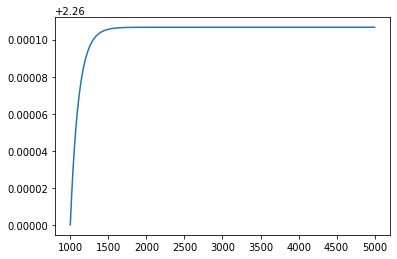

In [19]:
plt.plot(T,alpha_d_sol)
#plt.ylim(0,5)


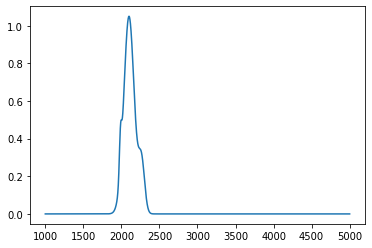

In [20]:
plt.plot(T,F)

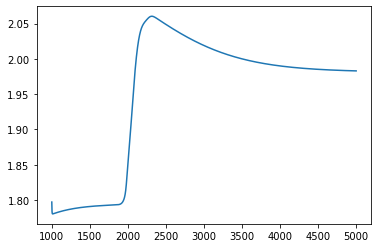

In [21]:
plt.plot(T, h_s_sol)

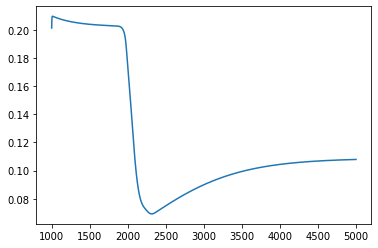

In [22]:
plt.plot(T, c_s_sol)

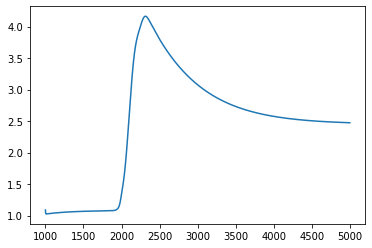

In [23]:
plt.plot(T, p_s_sol)
#plt.plot(T, p_sol)